In [1]:
import json

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from stellarpunk import util

In [2]:
df_base = pd.json_normalize(list(json.loads(line) for line in open("/tmp/stellarpunk_test.history", "r")))

In [3]:
df_base["eid"].unique()

array(['3b50211f-a414-4933-8427-41d0c6d2b9ba'], dtype=object)

In [4]:
#target_eid = df_base["eid"][0]
target_eid = df_base["eid"].unique()[0]
df_base = df_base[df_base["eid"] == target_eid].reset_index()
df_base["eid"].unique()

array(['3b50211f-a414-4933-8427-41d0c6d2b9ba'], dtype=object)

In [5]:
df_base

,index,eid,ts,loc,a,v,av,o.o,o.nnd,o.t_loc,o.cs,o.ct,o.ct_loc,o.ct_ts,o.cac,o.cbdr
0,0,3b50211f-a414-4933-8427-41d0c6d2b9ba,0.000000,"[0.0, 2400.0]",0.000000,"[0.0, 0.0]",0.000000,stellarpunk.orders.GoToLocation,inf,"[0, 0]",False,NaN,NaN,NaN,NaN,NaN
1,1,3b50211f-a414-4933-8427-41d0c6d2b9ba,0.016667,"[0.0, 2400.0]",0.000000,"[-7.654042494670958e-18, -0.041666666666666664]",-0.016667,stellarpunk.orders.GoToLocation,1200.000000,"[0, 0]",False,NaN,NaN,NaN,NaN,NaN
2,2,3b50211f-a414-4933-8427-41d0c6d2b9ba,0.033333,"[-1.2756737491118262e-19, 2399.9993055555556]",-0.000278,"[-1.5308084989341915e-17, -0.08333333333333333]",-0.033333,stellarpunk.orders.GoToLocation,1200.000000,"[0, 0]",False,80bd4c6e-dd6a-487d-8c2b-97784a30347b,"[0.0, 1200.0]",0.016667,False,False
3,3,3b50211f-a414-4933-8427-41d0c6d2b9ba,0.050000,"[-3.827021247335479e-19, 2399.9979166666667]",-0.000833,"[-2.296212748401287e-17, -0.125]",-0.050000,stellarpunk.orders.GoToLocation,1199.999306,"[0, 0]",False,80bd4c6e-dd6a-487d-8c2b-97784a30347b,"[0.0, 1200.0]",0.033333,False,False
4,4,3b50211f-a414-4933-8427-41d0c6d2b9ba,0.066667,"[-7.654042494670958e-19, 2399.9958333333334]",-0.001667,"[-3.061616997868383e-17, -0.16666666666666666]",-0.066667,stellarpunk.orders.GoToLocation,1199.997917,"[0, 0]",False,80bd4c6e-dd6a-487d-8c2b-97784a30347b,"[0.0, 1200.0]",0.050000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,1858,3b50211f-a414-4933-8427-41d0c6d2b9ba,30.966667,"[-362.39019035609965, 1198.365584023493]",-0.689430,"[10.403933757013519, -79.32582251003099]",-0.750642,stellarpunk.orders.GoToLocation,362.564412,"[0, 0]",False,80bd4c6e-dd6a-487d-8c2b-97784a30347b,"[0.0, 1200.0]",30.950000,False,False
1859,1859,3b50211f-a414-4933-8427-41d0c6d2b9ba,30.983333,"[-362.2167914601494, 1197.0434869816593]",-0.701941,"[10.362620896648632, -79.33124087505954]",-0.767308,stellarpunk.orders.GoToLocation,362.393876,"[0, 0]",False,80bd4c6e-dd6a-487d-8c2b-97784a30347b,"[0.0, 1200.0]",30.966667,False,False
1860,1860,3b50211f-a414-4933-8427-41d0c6d2b9ba,31.000000,"[-362.04408111187195, 1195.7212996337416]",-0.714729,"[10.321305220004225, -79.33663772363309]",-0.783975,stellarpunk.orders.GoToLocation,362.228857,"[0, 0]",False,80bd4c6e-dd6a-487d-8c2b-97784a30347b,"[0.0, 1200.0]",30.983333,False,False
1861,1861,3b50211f-a414-4933-8427-41d0c6d2b9ba,31.016667,"[-361.8720593582052, 1194.3990223383478]",-0.727795,"[10.279986738286818, -79.34201305429076]",-0.800642,stellarpunk.orders.GoToLocation,362.069363,"[0, 0]",False,80bd4c6e-dd6a-487d-8c2b-97784a30347b,"[0.0, 1200.0]",31.000000,False,False


In [6]:
loc = pd.DataFrame(np.vstack(df_base["loc"]), columns=["loc.x", "loc.y"])
v = pd.DataFrame(np.vstack(df_base["v"]), columns=["v.x", "v.y"])
#TODO: handle missing columns
o_tloc = pd.DataFrame(np.vstack(df_base["o.t_loc"].apply(lambda x: (np.nan, np.nan) if np.all(np.isnan(x)) else x)), columns=["o.t_loc.x", "o.t_loc.y"])
if "o.ct" in df_base:
    o_ctloc = pd.DataFrame(np.vstack(df_base["o.ct_loc"].apply(lambda x: (np.nan, np.nan) if np.all(np.isnan(x)) else x)), columns=["o.ct_loc.x", "o.ct_loc.y"])
else:
    empty_array = np.empty(len(df_base))
    empty_array[:] = np.nan
    o_ctloc = pd.DataFrame({"o.ct_loc": empty_array, "o.ct_loc.x": empty_array, "o.ct_loc.y": empty_array})
angle = pd.DataFrame(np.vstack(df_base.apply(lambda row: np.array(util.polar_to_cartesian(100, row["a"])), axis=1)), columns=["angle.x", "angle.y"])
df = pd.concat([df_base, loc, v, o_ctloc, o_tloc, angle], axis=1)

In [7]:
df

,index,eid,ts,loc,a,v,av,o.o,o.nnd,o.t_loc,...,loc.x,loc.y,v.x,v.y,o.ct_loc.x,o.ct_loc.y,o.t_loc.x,o.t_loc.y,angle.x,angle.y
0,0,3b50211f-a414-4933-8427-41d0c6d2b9ba,0.000000,"[0.0, 2400.0]",0.000000,"[0.0, 0.0]",0.000000,stellarpunk.orders.GoToLocation,inf,"[0, 0]",...,0.000000e+00,2400.000000,0.000000e+00,0.000000,NaN,NaN,0,0,100.000000,0.000000
1,1,3b50211f-a414-4933-8427-41d0c6d2b9ba,0.016667,"[0.0, 2400.0]",0.000000,"[-7.654042494670958e-18, -0.041666666666666664]",-0.016667,stellarpunk.orders.GoToLocation,1200.000000,"[0, 0]",...,0.000000e+00,2400.000000,-7.654042e-18,-0.041667,NaN,NaN,0,0,100.000000,0.000000
2,2,3b50211f-a414-4933-8427-41d0c6d2b9ba,0.033333,"[-1.2756737491118262e-19, 2399.9993055555556]",-0.000278,"[-1.5308084989341915e-17, -0.08333333333333333]",-0.033333,stellarpunk.orders.GoToLocation,1200.000000,"[0, 0]",...,-1.275674e-19,2399.999306,-1.530808e-17,-0.083333,0.0,1200.0,0,0,99.999996,-0.027778
3,3,3b50211f-a414-4933-8427-41d0c6d2b9ba,0.050000,"[-3.827021247335479e-19, 2399.9979166666667]",-0.000833,"[-2.296212748401287e-17, -0.125]",-0.050000,stellarpunk.orders.GoToLocation,1199.999306,"[0, 0]",...,-3.827021e-19,2399.997917,-2.296213e-17,-0.125000,0.0,1200.0,0,0,99.999965,-0.083333
4,4,3b50211f-a414-4933-8427-41d0c6d2b9ba,0.066667,"[-7.654042494670958e-19, 2399.9958333333334]",-0.001667,"[-3.061616997868383e-17, -0.16666666666666666]",-0.066667,stellarpunk.orders.GoToLocation,1199.997917,"[0, 0]",...,-7.654042e-19,2399.995833,-3.061617e-17,-0.166667,0.0,1200.0,0,0,99.999861,-0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,1858,3b50211f-a414-4933-8427-41d0c6d2b9ba,30.966667,"[-362.39019035609965, 1198.365584023493]",-0.689430,"[10.403933757013519, -79.32582251003099]",-0.750642,stellarpunk.orders.GoToLocation,362.564412,"[0, 0]",...,-3.623902e+02,1198.365584,1.040393e+01,-79.325823,0.0,1200.0,0,0,77.160869,-63.609750
1859,1859,3b50211f-a414-4933-8427-41d0c6d2b9ba,30.983333,"[-362.2167914601494, 1197.0434869816593]",-0.701941,"[10.362620896648632, -79.33124087505954]",-0.767308,stellarpunk.orders.GoToLocation,362.393876,"[0, 0]",...,-3.622168e+02,1197.043487,1.036262e+01,-79.331241,0.0,1200.0,0,0,76.359049,-64.570083
1860,1860,3b50211f-a414-4933-8427-41d0c6d2b9ba,31.000000,"[-362.04408111187195, 1195.7212996337416]",-0.714729,"[10.321305220004225, -79.33663772363309]",-0.783975,stellarpunk.orders.GoToLocation,362.228857,"[0, 0]",...,-3.620441e+02,1195.721300,1.032131e+01,-79.336638,0.0,1200.0,0,0,75.527075,-65.541292
1861,1861,3b50211f-a414-4933-8427-41d0c6d2b9ba,31.016667,"[-361.8720593582052, 1194.3990223383478]",-0.727795,"[10.279986738286818, -79.34201305429076]",-0.800642,stellarpunk.orders.GoToLocation,362.069363,"[0, 0]",...,-3.618721e+02,1194.399022,1.027999e+01,-79.342013,0.0,1200.0,0,0,74.664274,-66.522524


In [8]:
df["speed"] = np.linalg.norm(df[["v.x", "v.y"]], axis=1)
df["o_ct_dist"] = np.linalg.norm(np.vstack(df["loc"]) - np.vstack(df["o.ct_loc"].apply(lambda x: (np.nan, np.nan) if np.all(np.isnan(x)) else x)), axis=1)
df["o_t_dist"] = np.linalg.norm(np.vstack(df["loc"]) - np.vstack(df["o.t_loc"].apply(lambda x: (np.nan, np.nan) if np.all(np.isnan(x)) else x)), axis=1)

In [9]:
df

,index,eid,ts,loc,a,v,av,o.o,o.nnd,o.t_loc,...,v.y,o.ct_loc.x,o.ct_loc.y,o.t_loc.x,o.t_loc.y,angle.x,angle.y,speed,o_ct_dist,o_t_dist
0,0,3b50211f-a414-4933-8427-41d0c6d2b9ba,0.000000,"[0.0, 2400.0]",0.000000,"[0.0, 0.0]",0.000000,stellarpunk.orders.GoToLocation,inf,"[0, 0]",...,0.000000,NaN,NaN,0,0,100.000000,0.000000,0.000000,NaN,2400.000000
1,1,3b50211f-a414-4933-8427-41d0c6d2b9ba,0.016667,"[0.0, 2400.0]",0.000000,"[-7.654042494670958e-18, -0.041666666666666664]",-0.016667,stellarpunk.orders.GoToLocation,1200.000000,"[0, 0]",...,-0.041667,NaN,NaN,0,0,100.000000,0.000000,0.041667,NaN,2400.000000
2,2,3b50211f-a414-4933-8427-41d0c6d2b9ba,0.033333,"[-1.2756737491118262e-19, 2399.9993055555556]",-0.000278,"[-1.5308084989341915e-17, -0.08333333333333333]",-0.033333,stellarpunk.orders.GoToLocation,1200.000000,"[0, 0]",...,-0.083333,0.0,1200.0,0,0,99.999996,-0.027778,0.083333,1199.999306,2399.999306
3,3,3b50211f-a414-4933-8427-41d0c6d2b9ba,0.050000,"[-3.827021247335479e-19, 2399.9979166666667]",-0.000833,"[-2.296212748401287e-17, -0.125]",-0.050000,stellarpunk.orders.GoToLocation,1199.999306,"[0, 0]",...,-0.125000,0.0,1200.0,0,0,99.999965,-0.083333,0.125000,1199.997917,2399.997917
4,4,3b50211f-a414-4933-8427-41d0c6d2b9ba,0.066667,"[-7.654042494670958e-19, 2399.9958333333334]",-0.001667,"[-3.061616997868383e-17, -0.16666666666666666]",-0.066667,stellarpunk.orders.GoToLocation,1199.997917,"[0, 0]",...,-0.166667,0.0,1200.0,0,0,99.999861,-0.166667,0.166667,1199.995833,2399.995833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,1858,3b50211f-a414-4933-8427-41d0c6d2b9ba,30.966667,"[-362.39019035609965, 1198.365584023493]",-0.689430,"[10.403933757013519, -79.32582251003099]",-0.750642,stellarpunk.orders.GoToLocation,362.564412,"[0, 0]",...,-79.325823,0.0,1200.0,0,0,77.160869,-63.609750,80.005175,362.393876,1251.961151
1859,1859,3b50211f-a414-4933-8427-41d0c6d2b9ba,30.983333,"[-362.2167914601494, 1197.0434869816593]",-0.701941,"[10.362620896648632, -79.33124087505954]",-0.767308,stellarpunk.orders.GoToLocation,362.393876,"[0, 0]",...,-79.331241,0.0,1200.0,0,0,76.359049,-64.570083,80.005185,362.228857,1250.645479
1860,1860,3b50211f-a414-4933-8427-41d0c6d2b9ba,31.000000,"[-362.04408111187195, 1195.7212996337416]",-0.714729,"[10.321305220004225, -79.33663772363309]",-0.783975,stellarpunk.orders.GoToLocation,362.228857,"[0, 0]",...,-79.336638,0.0,1200.0,0,0,75.527075,-65.541292,80.005196,362.069363,1249.329958
1861,1861,3b50211f-a414-4933-8427-41d0c6d2b9ba,31.016667,"[-361.8720593582052, 1194.3990223383478]",-0.727795,"[10.279986738286818, -79.34201305429076]",-0.800642,stellarpunk.orders.GoToLocation,362.069363,"[0, 0]",...,-79.342013,0.0,1200.0,0,0,74.664274,-66.522524,80.005207,361.915402,1248.014588


In [10]:
df["angle.x"]

0       100.000000
1       100.000000
2        99.999996
3        99.999965
4        99.999861
           ...    
1858     77.160869
1859     76.359049
1860     75.527075
1861     74.664274
1862     73.769974
Name: angle.x, Length: 1863, dtype: float64

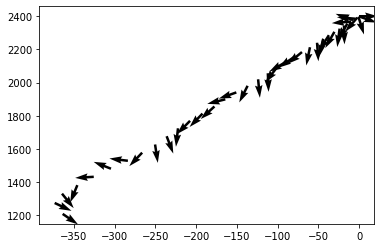

In [11]:
#plt.scatter(df["loc.x"], df["loc.y"])
#plt.axis('square')
sample = df.iloc[::50]
plt.quiver(sample["loc.x"], sample["loc.y"], sample["angle.x"], sample["angle.y"])#, scale=100)
#center = (0,2500)
#radius = 10000
#plt.xlim(center[0]-radius,center[0]+radius)
#plt.ylim(center[1]-radius,center[1]+radius)

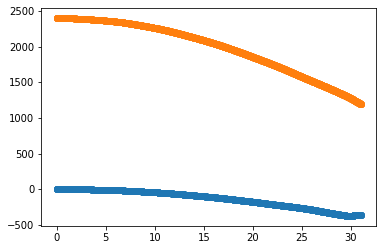

In [12]:
plt.scatter(df["ts"], df["loc.x"])
plt.scatter(df["ts"], df["loc.y"])

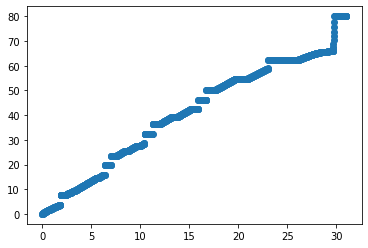

In [13]:
plt.scatter(df["ts"], df["speed"])

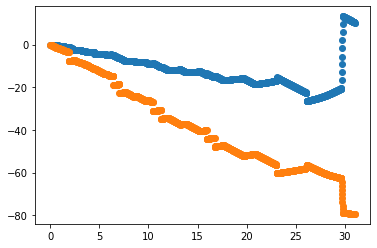

In [14]:
plt.scatter(df["ts"], df["v.x"])
plt.scatter(df["ts"], df["v.y"])

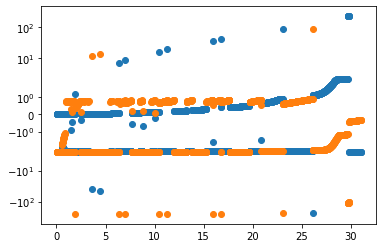

In [15]:
pd.DataFrame({
    "v":df["v.x"],
    "dv":(df["v.x"].shift(1) - df["v.x"]),
    "a":(df["v.x"].shift(1) - df["v.x"]) / (df["ts"].shift(1) - df["ts"]),
})
#plt.scatter(df["ts"], (df["v.x"] - df["v.x"].shift(-1)))#/(df["ts"]-df["ts"].shift(-1)))
plt.scatter(df["ts"], (df["v.x"].shift(1) - df["v.x"]) / (df["ts"].shift(1) - df["ts"]))
plt.scatter(df["ts"], (df["v.y"].shift(1) - df["v.y"]) / (df["ts"].shift(1) - df["ts"]))
plt.yscale("symlog")

(0.0, 0.020000000000000993)

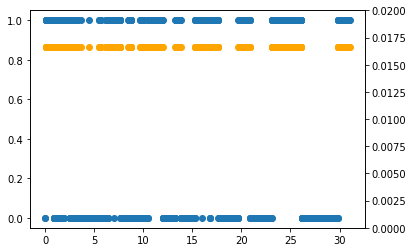

In [16]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.scatter(df["ts"], 1-df["o.ct"].isna().astype(int))
ax2.scatter(df["ts"], df["ts"] - df["o.ct_ts"], color="orange")

ax2.set_ylim(0,(df["ts"] - df["o.ct_ts"]).max()*1.2)

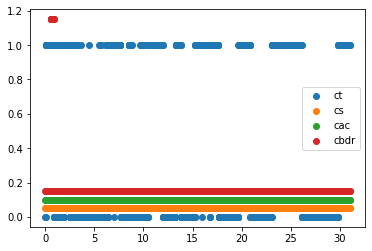

In [17]:
plt.scatter(df["ts"], (~(df["o.ct"].isna())).astype(int), label="ct")
plt.scatter(df["ts"], df["o.cs"].fillna(0).astype(int)+0.05, label="cs")
plt.scatter(df["ts"], df["o.cac"].fillna(0).astype(int)+0.1, label="cac")
plt.scatter(df["ts"], df["o.cbdr"].fillna(0).astype(int)+0.15, label="cbdr")
plt.legend()

(0.0, 1244.9992708333334)

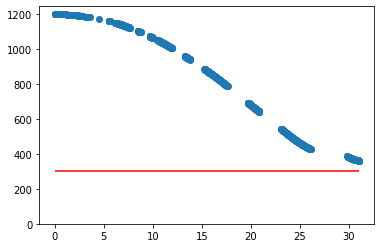

In [32]:
plt.scatter(df["ts"], df["o_ct_dist"])
plt.hlines(300, df["ts"].min(), df["ts"].max(), color="red")
plt.ylim(0)

In [19]:
df.groupby("o.ct")["ts"].describe()

,count,mean,std,min,25%,50%,75%,max
o.ct,,,,,,,,
80bd4c6e-dd6a-487d-8c2b-97784a30347b,839.0,15.626122,8.915408,0.033333,8.508333,16.066667,23.841667,31.033333


In [33]:
df.groupby("o.ct")["o_ct_dist"].describe()

,count,mean,std,min,25%,50%,75%,max
o.ct,,,,,,,,
80bd4c6e-dd6a-487d-8c2b-97784a30347b,839.0,824.011713,290.980903,361.76698,509.287574,854.316293,1102.348257,1199.999306


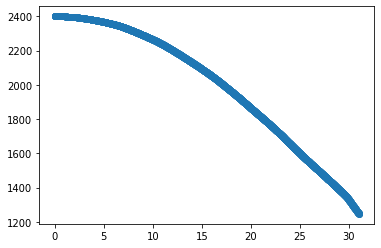

In [20]:
plt.scatter(df["ts"], df["o_t_dist"])
#plt.ylim(900)
#plt.xlim(18)

In [21]:
df.groupby(["o.t_loc.x", "o.t_loc.y"])["ts"].describe().sort_values(["min"])

,,count,mean,std,min,25%,50%,75%,max
o.t_loc.x,o.t_loc.y,,,,,,,,
0,0,1863.0,15.516667,8.965768,0.0,7.758333,15.516667,23.275,31.033333


In [28]:
import ipywidgets
def plot_collision_chart(max_time):
    sample = df[df["ts"] < max_time].iloc[::100]
    plt.quiver(sample["loc.x"], sample["loc.y"], sample["v.x"], sample["v.y"])
    plt.scatter(sample["o.ct_loc.x"], sample["o.ct_loc.y"])
    plt.scatter(sample["o.t_loc.x"], sample["o.t_loc.y"])
    #plt.axis('square')
    center = (0,1000)
    radius = 1200
    plt.xlim(center[0]-radius,center[0]+radius)
    plt.ylim(center[1]-radius,center[1]+radius)

    plt.gca().get_xlim()[1]-plt.gca().get_xlim()[0], plt.gca().get_ylim()[1]-plt.gca().get_ylim()[0]
    plt.show()
    
ipywidgets.interact(plot_collision_chart, max_time=ipywidgets.FloatSlider(value=df["ts"].max(), min=df["ts"].min(), max=df["ts"].max(), continuous_update=False))


interactive(children=(FloatSlider(value=31.033333333332852, continuous_update=False, description='max_time', m…

<function __main__.plot_collision_chart(max_time)>